In [15]:
from sklearn.datasets import load_svmlight_file
import numpy as np
import matplotlib.pyplot as plt
from math import exp,log
import math
import random
from random import randint

x_train,y_train=load_svmlight_file("C:/Users/Bean/Desktop/机器学习/机器学习实验课/a9a.txt")
x_train=x_train.toarray()
x_train=np.hstack((x_train,np.ones([np.shape(x_train)[0],1])))
y_train=y_train.reshape(np.shape(y_train)[0],1)
x_test,y_test=load_svmlight_file("C:/Users/Bean/Desktop/机器学习/机器学习实验课/a9a.t",123)
x_test=x_test.toarray()
x_test=np.hstack((x_test,np.ones([np.shape(x_test)[0],1])))
y_test=y_test.reshape(np.shape(y_test)[0],1)

n=np.shape(x_train)[0]
m=np.shape(x_train)[1]

def lossFunction(X,Y,W,C):
    loss=0
    n,m=np.shape(X)
    for i in range(n):
        loss=max(0,1-Y[i]*(W.T.dot(X[i])))
    loss=C/n*loss+(W.T.dot(W)/2)[0][0]
    return loss

def gradient(X,Y,W,C):
    g=np.zeros(np.shape(W))
    n,m=np.shape(X)
    for i in range(n):
        if 1-Y[i]*(W.T.dot(X[i]))>=0:
            g=W-C*X.T.dot(Y)
        else:
            g=W
    return g

In [21]:
#NAG
W=np.zeros((m,1))
NAG=[]
eta=1e-6
gamma=1e-5
batch=100
C=10
v=0
for epoch in range(1500):
    random.seed()
    i=randint(0,n-1-batch)
    g=gradient(x_train[i:i+batch].reshape((batch,m)),y_train[i:i+batch].reshape((batch,1)),W-gamma*v,C)
    v=gamma*v+eta*g
    W=W-v
    l_test=lossFunction(x_test,y_test,W,C)
    NAG.append(l_test)
print("finish")

finish


In [22]:
#RMSProp
W=np.zeros((m,1))
RMSProp=[]
eta=1e-4
gamma=0.9
epsilon=1e-6
batch=100
C=10
G=0
for epoch in range(1500):
    random.seed()
    i=randint(0,n-1-batch)
    g=gradient(x_train[i:i+batch].reshape((batch,m)),y_train[i:i+batch].reshape((batch,1)),W,C)
    G=gamma*G+(1-gamma)*(g*g)
    W=W-eta/np.sqrt(G+epsilon)*g
    l_test=lossFunction(x_test,y_test,W,C)
    RMSProp.append(l_test)
print('finish')

finish


In [23]:
#AdaDelta
W=np.zeros((m,1))
AdaDelta=[]
gamma=0.95
epsilon=1e-9
batch=100
C=10
G=0
dt=0
for epoch in range(1500):
    random.seed()
    i=randint(0,n-1-batch)
    g=gradient(x_train[i:i+batch].reshape((batch,m)),y_train[i:i+batch].reshape((batch,1)),W,C)
    G=gamma*G+(1-gamma)*g*g
    dw=-np.sqrt(dt+epsilon)/np.sqrt(G+epsilon)*g
    W=W+dw
    dt=gamma*dt+(1-gamma)*dw*dw
    l_test=lossFunction(x_test,y_test,W,C)
    AdaDelta.append(l_test)
print('finish')

finish


In [24]:
#Adam
W=np.zeros((m,1))
Adam=[]
beta=0.9
gamma=0.9
eta=1e-5
epsilon=1e-9
batch=100
M=0
for epoch in range(1500):
    i=randint(0,n-1-batch)
    g=gradient(x_train[i:i+batch].reshape((batch,m)),y_train[i:i+batch].reshape((batch,1)),W,C)
    M=beta*M+(1-beta)*g
    G=gamma*G+(1-gamma)*g*g
    alpha=eta*np.sqrt(1-math.pow(gamma,epoch))/(1-beta)
    W=W-alpha*M/np.sqrt(G+epsilon)
    l_test=lossFunction(x_test,y_test,W,C)
    Adam.append(l_test)
print('finish')

finish


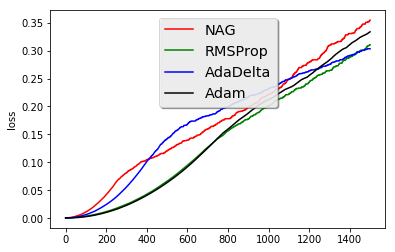

In [25]:
plt.ylabel("loss")
plt.plot(NAG,color='red',label='NAG')
plt.plot(RMSProp,color='green',label='RMSProp')
plt.plot(AdaDelta,color='blue',label='AdaDelta')
plt.plot(Adam,color='black',label='Adam')
plt.legend(loc='upper center',shadow=True,fontsize='x-large')
plt.show()